## Pytorch Fundamentals

PyTorch is an open-source machine learning framework developed by Facebook's AI Research lab. It's widely used for deep learning applications due to its flexibility, dynamic computation graphs, and pythonic nature.

Based on: https://www.learnpytorch.io/ https://playground.tensorflow.org/

In [ ]:
#Runtime/Change Runtime Type
!nvidia-smi

Sun Nov  2 15:40:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.8.0+cu126


### Introduction to Tensors

Tensors are multi-dimensional arrays, similar to NumPy arrays but with GPU acceleration support. In deep learning, everything from images to model weights—is represented as tensors, making them the foundation of all neural network operations.

#### Creating Tensors

In [ ]:
TENSOR = torch.tensor([[[[1,2,3],
                      [1,2,3],
                      [1,2,3]],
                      [[1,2,3],
                      [1,2,3],
                      [1,2,3]]],
                       [[[1,2,3],
                      [1,2,3],
                      [1,2,3]],
                      [[1,2,3],
                      [1,2,3],
                      [1,2,3]]]])
print(f"ndim:{TENSOR.ndim}, shape:{TENSOR.shape}")

ndim:4, shape:torch.Size([2, 2, 3, 3])


In [ ]:
TENSOR[0][0]

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [ ]:
# Using creation functions
random_tensor = torch.rand(2,4,1)
random_tensor

tensor([[[0.6352],
         [0.6796],
         [0.4856],
         [0.1102]],

        [[0.3500],
         [0.5884],
         [0.6106],
         [0.2150]]])

In [ ]:
random_tensor.shape, random_tensor.ndim

(torch.Size([2, 4, 1]), 3)

In [ ]:
# zeros
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# ones
ones = torch.ones(3,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# series
one_to_ten = torch.arange(start=1,end=1000, step=77)
one_to_ten

tensor([  1,  78, 155, 232, 309, 386, 463, 540, 617, 694, 771, 848, 925])

In [ ]:
one_to_ten.device

device(type='cpu')

In [ ]:
# use the gpu
cuda_tensor = torch.tensor([1,2,3],
                            device='cuda')
cuda_tensor

tensor([1, 2, 3], device='cuda:0')

In [ ]:
cuda2_tensor = one_to_ten.to('cuda')
cuda2_tensor

tensor([  1,  78, 155, 232, 309, 386, 463, 540, 617, 694, 771, 848, 925],
       device='cuda:0')

⚠️ **Common PyTorch Errors to Watch Out For:**

> 1. **Device Mismatch** - Tensors and models must be on the same device (CPU or GPU). Always ensure both your data and model are on the same device before operations.

> 2. **Shape Mismatches** - Incompatible tensor dimensions in operations (e.g., matrix multiplication, layer input/output sizes). Always check tensor shapes with `.shape`.

### Manipulating Tensors

In [ ]:
# Basic arithmetic
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
tensor = torch.tensor([1,2,3])
tensor * 10

tensor([10, 20, 30])

Do you remember how matrix multiplication [works](http://matrixmultiplication.xyz/)?

In [ ]:
# Torch vs Numpy
tensor_A = torch.rand(10000,10)
tensor_B = tensor_A.T
array_A = np.random.rand(10000, 10)
array_B = array_A.T
tensor_A.shape, tensor_B.shape
tensor_A.to('cuda')
tensor_B.to('cuda')

tensor([[0.9068, 0.7772, 0.6718,  ..., 0.5755, 0.0324, 0.0170],
        [0.4052, 0.1699, 0.8473,  ..., 0.5931, 0.5637, 0.0987],
        [0.6938, 0.8347, 0.2977,  ..., 0.1633, 0.8594, 0.3869],
        ...,
        [0.0651, 0.7425, 0.3894,  ..., 0.2848, 0.0423, 0.6420],
        [0.8525, 0.1000, 0.3392,  ..., 0.1905, 0.9535, 0.2385],
        [0.7628, 0.8261, 0.1056,  ..., 0.2547, 0.1371, 0.3964]],
       device='cuda:0')

In [ ]:
%%time
torch.matmul(tensor_A, tensor_B)

CPU times: user 42.7 ms, sys: 157 ms, total: 199 ms
Wall time: 227 ms


tensor([[4.9101, 3.7108, 2.0193,  ..., 2.9514, 2.9505, 1.7605],
        [3.7108, 4.2884, 1.6661,  ..., 2.5979, 2.3768, 1.9494],
        [2.0193, 1.6661, 1.6600,  ..., 1.4102, 1.3146, 0.8049],
        ...,
        [2.9514, 2.5979, 1.4102,  ..., 2.8055, 1.9974, 1.0363],
        [2.9505, 2.3768, 1.3146,  ..., 1.9974, 3.0792, 1.2366],
        [1.7605, 1.9494, 0.8049,  ..., 1.0363, 1.2366, 1.2610]])

In [ ]:
%%time
np.matmul(array_A,array_B)

CPU times: user 505 ms, sys: 265 ms, total: 770 ms
Wall time: 451 ms


array([[3.05157439, 2.43811071, 2.78608641, ..., 2.90208076, 2.17699734,
        2.61031012],
       [2.43811071, 3.44099643, 2.95035846, ..., 3.18243945, 2.32634593,
        2.7444202 ],
       [2.78608641, 2.95035846, 3.7103955 , ..., 2.7614424 , 2.15596102,
        3.55308208],
       ...,
       [2.90208076, 3.18243945, 2.7614424 , ..., 4.36850983, 2.48433049,
        2.67087211],
       [2.17699734, 2.32634593, 2.15596102, ..., 2.48433049, 2.5857002 ,
        1.70673156],
       [2.61031012, 2.7444202 , 3.55308208, ..., 2.67087211, 1.70673156,
        4.1199686 ]])

In [ ]:
# Aggregation operations
print(f"mean: {tensor.float().mean()}")
print(f"sum: {tensor.sum()}")
print(f"max: {tensor.max()}")

mean: 2.0
sum: 6
max: 3


##PyTorch Neural Network Classification


- Start by preparing your data and convert it into tensors.
- Check your device with and move your data and model to GPU using
- Define your model by subclassing `nn.Module` and implementing the `forward()` method.
- Use layers from `torch.nn`, like `nn.Linear`, `nn.Conv2d`, and `nn.ReLU`, to build your architecture.

### Get the Data

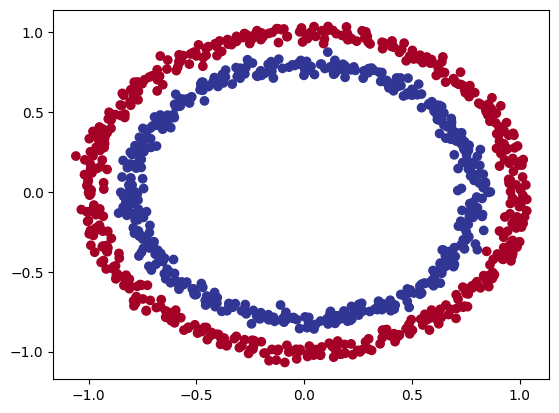

In [ ]:
import pandas as pd
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

# Make DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
import torch
from torch import nn

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% test, 80% train
    random_state=42       # reproducible split
)

# Check lengths
print(len(X_train), len(X_test), len(y_train), len(y_test))

800 200 800 200


In [ ]:
# Use GPU if available, otherwise CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


### Build the model

Visualize a [Neural Network](https://playground.tensorflow.org/)

In [ ]:
import torch
from torch import nn

# Build a simple MLP model for circle classification
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model and move it to the correct device
model_0 = CircleModel().to(device)
print(model_0)

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Replicate the model with nn.Sequential
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
).to(device)

print(model_0)

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# What is a DL model?
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3783, -0.1177],
                      [ 0.5550,  0.6892],
                      [-0.5122, -0.6439],
                      [ 0.0392, -0.7070],
                      [ 0.3294,  0.5000],
                      [ 0.4956,  0.3668],
                      [-0.3337,  0.0038],
                      [ 0.5099,  0.6259],
                      [ 0.6216,  0.4512],
                      [-0.1609, -0.2403]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.1832,  0.2463,  0.6022, -0.0819, -0.6613, -0.4834, -0.6424, -0.3770,
                      -0.5286, -0.3561], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1664, -0.2402, -0.1084, -0.2807,  0.1215,  0.0362, -0.0955,  0.0258,
                       -0.1883, -0.0288],
                      [-0.1155, -0.1851, -0.0391, -0.1841,  0.2303, -0.0982,  0.1240,  0.2753,
                       -0.0791,  0.1755],
                      [ 0.2656,  0.233

###Train the model

- Choose a [loss function](https://docs.pytorch.org/docs/stable/nn.html#loss-functions) and an [optimizer](https://docs.pytorch.org/docs/stable/optim.html)

- **Train:** 1. Forward pass | 2. Calculate loss and accuracy | 3. Optimizer zero grad | 4. Loss backward | 5. Optimizer step

- **Testing:** 1. Forward pass | 2. Calculate loss and accuracy

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# Fit the model
torch.cuda.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():

      # 1. Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71072, Accuracy: 50.00% | Test Loss: 0.70789, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68704, Accuracy: 60.00% | Test Loss: 0.68866, Test Accuracy: 54.50%
Epoch: 200 | Loss: 0.68223, Accuracy: 58.88% | Test Loss: 0.68564, Test Accuracy: 52.50%
Epoch: 300 | Loss: 0.67537, Accuracy: 58.13% | Test Loss: 0.68142, Test Accuracy: 52.50%
Epoch: 400 | Loss: 0.66608, Accuracy: 58.75% | Test Loss: 0.67610, Test Accuracy: 52.00%
Epoch: 500 | Loss: 0.65476, Accuracy: 59.25% | Test Loss: 0.66992, Test Accuracy: 53.50%
Epoch: 600 | Loss: 0.63957, Accuracy: 61.25% | Test Loss: 0.65981, Test Accuracy: 54.50%
Epoch: 700 | Loss: 0.61119, Accuracy: 65.88% | Test Loss: 0.63308, Test Accuracy: 59.50%
Epoch: 800 | Loss: 0.55210, Accuracy: 85.88% | Test Loss: 0.57320, Test Accuracy: 79.00%
Epoch: 900 | Loss: 0.45848, Accuracy: 93.50% | Test Loss: 0.48331, Test Accuracy: 89.00%


In [ ]:
# @title
# Download helper functions from Learn PyTorch repo (if not already downloaded)
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

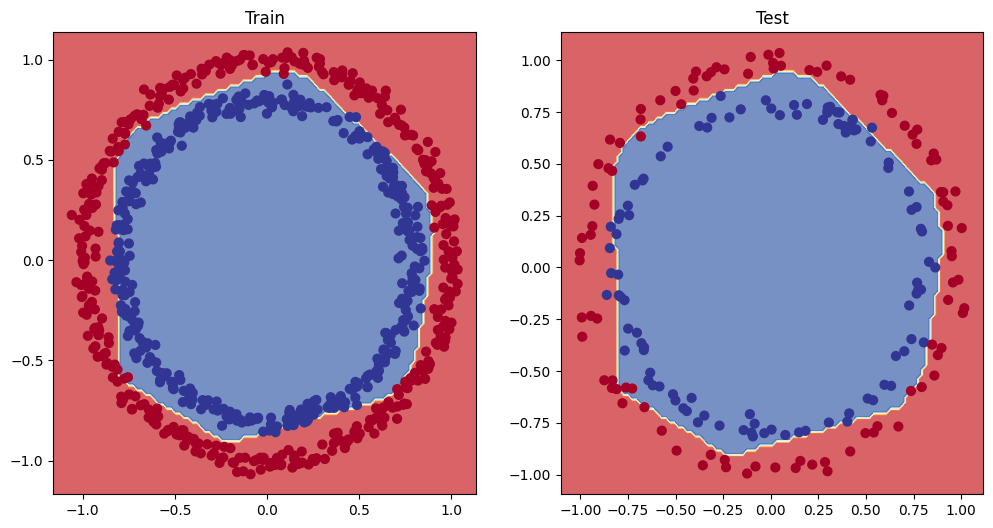

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) # model_3 = has non-linearity

In [ ]:
# Summary of the model we built

# Install dependency (run once in notebooks)
!pip install torchinfo

from torchinfo import summary

summary(model_0, input_size=(1000, 2))

Layer (type:depth-idx)                   Output Shape              Param #
CircleModel                              [1000, 1]                 --
├─Linear: 1-1                            [1000, 10]                30
├─ReLU: 1-2                              [1000, 10]                --
├─Linear: 1-3                            [1000, 10]                110
├─ReLU: 1-4                              [1000, 10]                --
├─Linear: 1-5                            [1000, 1]                 11
Total params: 151
Trainable params: 151
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.15
Input size (MB): 0.01
Forward/backward pass size (MB): 0.17
Params size (MB): 0.00
Estimated Total Size (MB): 0.18

### Exploring Modular PyTorch

PyTorch is modular by design, which makes it easy to **reuse code** and organize your projects.

In [ ]:
import torch
from model_utils import BinaryClassifier, setup_training, train_model, make_predictions

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BinaryClassifier().to(device)
loss_fn, optimizer = setup_training(model, learning_rate=0.1)

# Train
results = train_model(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=1000,
    device=device,
    print_every=100
)

# Predict
predictions = make_predictions(model, X_test, device=device)

Epoch: 0 | Loss: 0.70949, Accuracy: 50.00% | Test Loss: 0.70686, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69174, Accuracy: 50.38% | Test Loss: 0.69279, Test Accuracy: 51.00%
Epoch: 200 | Loss: 0.68943, Accuracy: 52.88% | Test Loss: 0.69100, Test Accuracy: 53.00%
Epoch: 300 | Loss: 0.68652, Accuracy: 56.62% | Test Loss: 0.68886, Test Accuracy: 54.00%
Epoch: 400 | Loss: 0.68194, Accuracy: 59.62% | Test Loss: 0.68558, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.67431, Accuracy: 62.62% | Test Loss: 0.68000, Test Accuracy: 60.00%
Epoch: 600 | Loss: 0.66135, Accuracy: 67.25% | Test Loss: 0.66997, Test Accuracy: 62.00%
Epoch: 700 | Loss: 0.63510, Accuracy: 74.38% | Test Loss: 0.64756, Test Accuracy: 66.50%
Epoch: 800 | Loss: 0.58701, Accuracy: 89.00% | Test Loss: 0.60441, Test Accuracy: 86.50%
Epoch: 900 | Loss: 0.49093, Accuracy: 98.25% | Test Loss: 0.51629, Test Accuracy: 95.50%


## Some Inspiring Examples

Some of PyTorch’s projects can achieve very impressive results, from image recognition to text generation.

Installing ultralytics...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
✓ ultralytics installation complete


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-11-2 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 155MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 630x1200 8 persons, 1 umbrella
Speed: 281.8ms pre-process, 82.7ms inference, 30.7ms NMS per image at shape (1, 3, 352, 640)


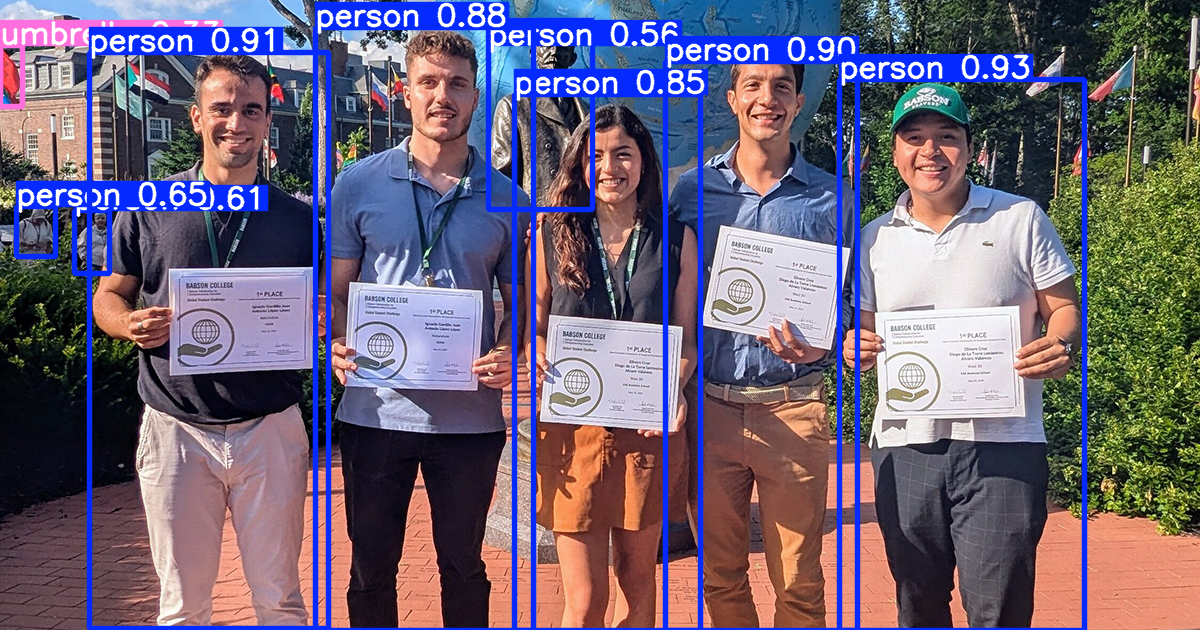

,xmin,ymin,xmax,ymax,confidence,class,name
0,839.713806,79.526649,1084.008301,630.000000,0.927317,0,person
1,89.826416,52.123344,328.529846,628.513855,0.907975,0,person
2,665.480530,61.180309,857.487549,630.000000,0.895094,0,person
3,315.966064,27.617081,533.907471,630.000000,0.875733,0,person
4,514.749939,94.324944,700.424133,630.000000,0.850520,0,person
5,16.772381,206.243637,55.308849,256.735077,0.653479,0,person
6,74.435349,210.186813,109.642853,273.230408,0.605641,0,person
7,488.418762,20.895237,592.359375,209.267838,0.561056,0,person
8,0.381547,45.549297,22.528799,106.352211,0.331521,25,umbrella


In [ ]:
# Source: https://pytorch.org/hub/ultralytics_yolov5/
# Check if ultralytics is installed before installing
try:
    import ultralytics
    print(f"✓ ultralytics is already installed (version {ultralytics.__version__})")
except ImportError:
    print("Installing ultralytics...")
    !pip install -U ultralytics
    print("✓ ultralytics installation complete")

import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Images
imgs = ['https://entrepreneurship.babson.edu/wp-content/uploads/2024/07/Global-student-challenge-winners-1200.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

In [ ]:
# Sorce: https://huggingface.co/TinyLlama/TinyLlama-1.1B-Chat-v1.0
# Install transformers from source - only needed for versions <= v4.34
# pip install git+https://github.com/huggingface/transformers.git
# pip install accelerate

import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0", torch_dtype=torch.bfloat16, device_map="auto")

# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
messages = [
    {
        "role": "system",
        "content": """You are an entrepreneur-style chatbot with a sense of humor and confident optimism.
                      Be concise and playful in your responses.""",

    },
    {"role": "user", "content": "Learning PyTorch seems too hard, I’d rather become a TikToker."},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
outputs = pipe(prompt, max_new_tokens=100, do_sample=True, temperature=0.9, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])